<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#In-this-notebook," data-toc-modified-id="In-this-notebook,-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>In this notebook,</a></span></li><li><span><a href="#Expected-utility-via-Monte-Carlo" data-toc-modified-id="Expected-utility-via-Monte-Carlo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Expected utility via Monte Carlo</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-exact-solution" data-toc-modified-id="Plotting-the-exact-solution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotting the exact solution</a></span></li><li><span><a href="#MC-implementation" data-toc-modified-id="MC-implementation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>MC implementation</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

# 4. Expected utility and Monte Carlo in Python
**Camilo A. Garcia Trillos - 2020**

---

## In this notebook,
- we look at the Monte Carlo method and how to use it to approximate expected utilities or certainty equivalents.
- we use Python to plot information using matplotlib, including a histogram and a regression
---

Let us import some packages: math, numpy, matplotlib and scipy

In [1]:
import math
import numpy as np
import scipy as sp
from numpy.random import default_rng  #  pseudo-random number generator
import matplotlib.pyplot as plt

# This is an indicator to tell jupyter notebook to show us all plots inline:
%matplotlib inline 


## Expected utility via Monte Carlo

To compute the expected utility of a wealth gamble $W$ we can use he law of large numbers. Indeed, if $E[|u(W)|]<\infty$, we have
$$  \frac{1}{N} \sum_{i=1}^N u(W_i)  \rightarrow \mathbb E[u(W)] \text{ as } N\rightarrow \infty,$$
where $(W_i)$ is a family of independent draws of random variables with $W_i \sim W$ for each $i$.

The Monte Carlo method relies on this equality to produce an approximation to the expectation (by choosing a large N and calculating the empirical average).


To see how this works, let us start with $W$ being normally distributed, that is $W = \sigma N + \mu$, where $\mu, \sigma \in \mathbb R$ and $N$ is standard normally distributed.  

Now, let us suppose first we want to compute expected utility of a CARA utility $u(x) = 1-\exp(-\alpha * x)$. We can calculate explicitly
$$ \mathbb E[u(W)] = \mathbb E[1- \exp(-\alpha \sigma N - \alpha \mu  ))] =1- \exp\left(-\alpha \mu + \frac 1 2 \alpha^2 \sigma^2  \right).$$

We use this value to compare to the value approximated by Monte Carlo as explained before. Let us build a plot of this function in some given domain.

### Plotting the exact solution

There are several libraries allowing us to plot in Python. We will use one of the simplest: Matplotlib.

A simple way to plot in this library is to provide it with vectors of input and output. To try it, let us simply plot the result of the (exact) expected utility when the CARA coefficient changes.

We start by sampling the space of coefficients of risk aversion:

In [2]:
x = np.linspace(0.001,3,100) # creates a vector of size 100 with numbers between 0.1 and 30
print(x)

[1.00000000e-03 3.12929293e-02 6.15858586e-02 9.18787879e-02
 1.22171717e-01 1.52464646e-01 1.82757576e-01 2.13050505e-01
 2.43343434e-01 2.73636364e-01 3.03929293e-01 3.34222222e-01
 3.64515152e-01 3.94808081e-01 4.25101010e-01 4.55393939e-01
 4.85686869e-01 5.15979798e-01 5.46272727e-01 5.76565657e-01
 6.06858586e-01 6.37151515e-01 6.67444444e-01 6.97737374e-01
 7.28030303e-01 7.58323232e-01 7.88616162e-01 8.18909091e-01
 8.49202020e-01 8.79494949e-01 9.09787879e-01 9.40080808e-01
 9.70373737e-01 1.00066667e+00 1.03095960e+00 1.06125253e+00
 1.09154545e+00 1.12183838e+00 1.15213131e+00 1.18242424e+00
 1.21271717e+00 1.24301010e+00 1.27330303e+00 1.30359596e+00
 1.33388889e+00 1.36418182e+00 1.39447475e+00 1.42476768e+00
 1.45506061e+00 1.48535354e+00 1.51564646e+00 1.54593939e+00
 1.57623232e+00 1.60652525e+00 1.63681818e+00 1.66711111e+00
 1.69740404e+00 1.72769697e+00 1.75798990e+00 1.78828283e+00
 1.81857576e+00 1.84886869e+00 1.87916162e+00 1.90945455e+00
 1.93974747e+00 1.970040

We now implement the exact solution expected CARA utility under normal assumptions. Since it is a simple expression, we can use a lambda function as introduced before.

In [3]:
# The operations in expected_u are well defined for vectors as long as mu,sd,x broadcast correctly together.
expected_u = lambda mu,sigma,alpha: 1-np.exp(-alpha*mu+0.5*alpha**2*sigma**2)

Note that we use 'np.exp' and not 'math.exp': this is because we want the function to be 'vectorial', that is, to accept vectors as an input 

(try changing np.exp for math.exp, run the code and then run the code below... there will be an error).

In [4]:
sd, mu = 2,5  # Equivalently sd=2 and mu=5
y=expected_u(mu,sd,x) # Note that x is a vector
print(y) # And so is y

[ 4.98553078e-03  1.43161779e-01  2.59436323e-01  3.57578415e-01
  4.40665016e-01  5.11214871e-01  5.71295417e-01  6.22608244e-01
  6.66557592e-01  7.04305396e-01  7.36815622e-01  7.64890079e-01
  7.89197408e-01  8.10296616e-01  8.28656217e-01  8.44669848e-01
  8.58669036e-01  8.70933653e-01  8.81700514e-01  8.91170449e-01
  8.99514138e-01  9.06876943e-01  9.13382902e-01  9.19138057e-01
  9.24233215e-01  9.28746256e-01  9.32744058e-01  9.36284107e-01
  9.39415849e-01  9.42181820e-01  9.44618597e-01  9.46757599e-01
  9.48625755e-01  9.50246068e-01  9.51638082e-01  9.52818282e-01
  9.53800408e-01  9.54595733e-01  9.55213272e-01  9.55659954e-01
  9.55940751e-01  9.56058773e-01  9.56015322e-01  9.55809920e-01
  9.55440295e-01  9.54902345e-01  9.54190056e-01  9.53295395e-01
  9.52208157e-01  9.50915768e-01  9.49403046e-01  9.47651906e-01
  9.45640992e-01  9.43345252e-01  9.40735416e-01  9.37777378e-01
  9.34431459e-01  9.30651531e-01  9.26383973e-01  9.21566425e-01
  9.16126303e-01  9.09979

If for some reason you cannot implement directly a vectorial function, it is possible to use a loop or the function np.vectorize to render the function vector ready.

We are ready to make the plot:

Text(0, 0.5, 'Expected utility')

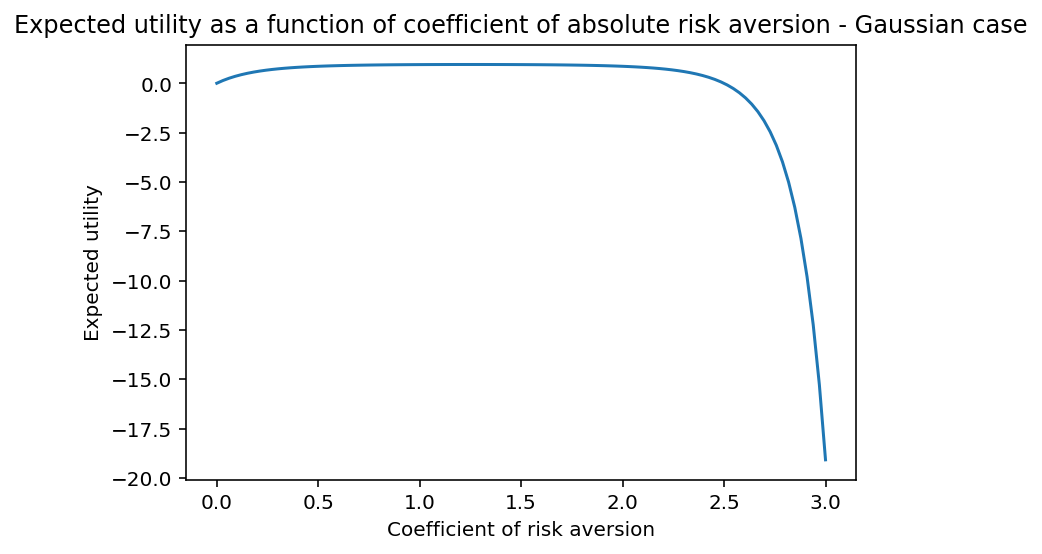

In [5]:
plt.plot(x,y)   # Make a plot between x and y
plt.title('Expected utility as a function of coefficient of absolute risk aversion - Gaussian case') # Add a title
plt.xlabel('Coefficient of risk aversion') # Add a label on the x axis
plt.ylabel('Expected utility') # Add a label on the y axis

### MC implementation

Let us now look at the Monte Carlo approximation of the above function. We start by defining a function that calculates the CARA utility:

In [6]:
cara_utility = lambda x,alpha: 1-np.exp(-alpha*x)

In [7]:
# Some tests on our function
assert cara_utility(1,1)== 1-1./math.e , "Failed test with x=1, alpha =1"
assert cara_utility(5,2)== 1-math.e**-10., "Failed test with x=5, alpha=2"

We can now generate a sample of wealths, distributed like a $\mathcal N (\mu,\sigma^2)$. 

In [8]:
sd, mu = 2,5  # Equivalently sd=2 and mu=5
N = 10000
rng = default_rng()
sample_gaussian = rng.normal(mu,sd,N)

How can we check that these are Gaussian? We can plot the histogram of the empirical distribution defined. The package matplotlib has a convenient function for this: *plt.hist* (recall that plt is our alias for pyplot)

Text(0, 0.5, 'density')

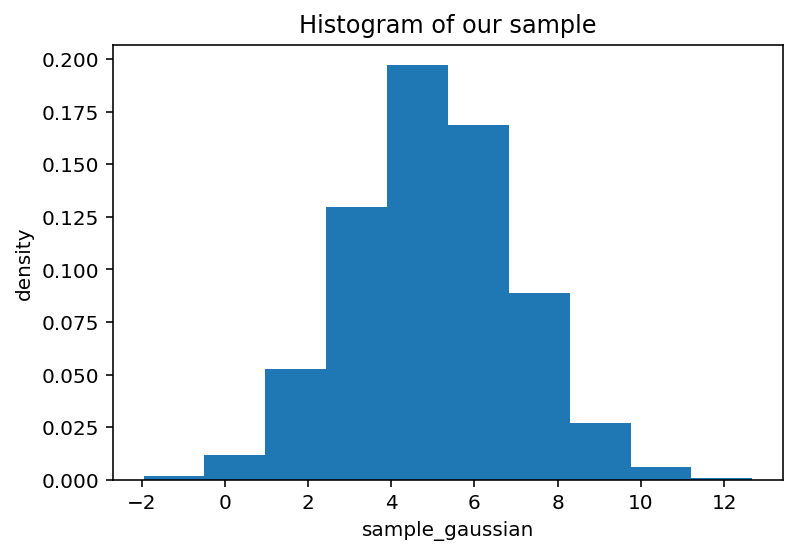

In [9]:
plt.hist(sample_gaussian, density=True)  # Plots the histogram, normalising to obtain a pdf.
plt.title('Histogram of our sample') # Add a title to the plot
plt.xlabel('sample_gaussian') # Add a label on the X axis
plt.ylabel('density') # Add a label on the Y axis

It looks like a good Gaussian sample with our parameters (centred in 5 and with standard deviation 2). In later notebooks we will learn some alternative ways for checking Gaussianity. 

We can now calculate a Monte Carlo approximation of our expected utility. Examine the code below:

In [10]:
cara_utility(sample_gaussian,1).mean()  # In one line, we evaluate the cara utility for each entry of the sample, and then calculate the mean of the resulting vector

0.9549462281514323

Observe now the following: the estimation is random. To see this, let us run the estimation with another sample

In [11]:
cara_utility(rng.normal(mu,sd,N),1).mean()  

0.9539255937674046

As expected, the two values are close but different. Indeed, this estimator is **random**, because it depends on the sample, which is itself random. This is something to be taken into account when using Monte Carlo estimators. 

In fairness, the Python implementation of the MC estimator can only produce a pseudo-random generation. To see this, we can fix the seed of the pseudo-random generation algorithm and compare the answers

In [12]:
rng = default_rng(1234)
sample_gaussian = rng.normal(mu,sd,N)
mc_eu1 = cara_utility(sample_gaussian,1).mean()
rng = default_rng(1234)
sample_gaussian2 = rng.normal(mu,sd,N)
mc_eu2 = cara_utility(sample_gaussian2,1).mean()
print(mc_eu1-mc_eu2)

0.0


Setting the random states allows us to repeat the same sequence on the pseudo-random generation.

Now, let us remind ourselves of the closed form solution:

In [13]:
expected_u(mu,sd,1)

0.950212931632136

We see that the value is very close to the value(s) estimated via MC. Indeed, this error can be explained via the central limit theorem, which give us a control on the L_2 norm and is of the form

$$\left \|\mathbb E[u(W)] - \frac 1 N \sum_{i=1}^N u(W_i)    \right \|_{L_2} \leq \frac{C}{N^{1/2}} {\rm sd}(X_1)  $$

Let us verify this empirically, using a plot and a regression. We want to retrieve the rate of convergence, which is the power 1/2 in the above control. To do this we use a log-log plot (think why).

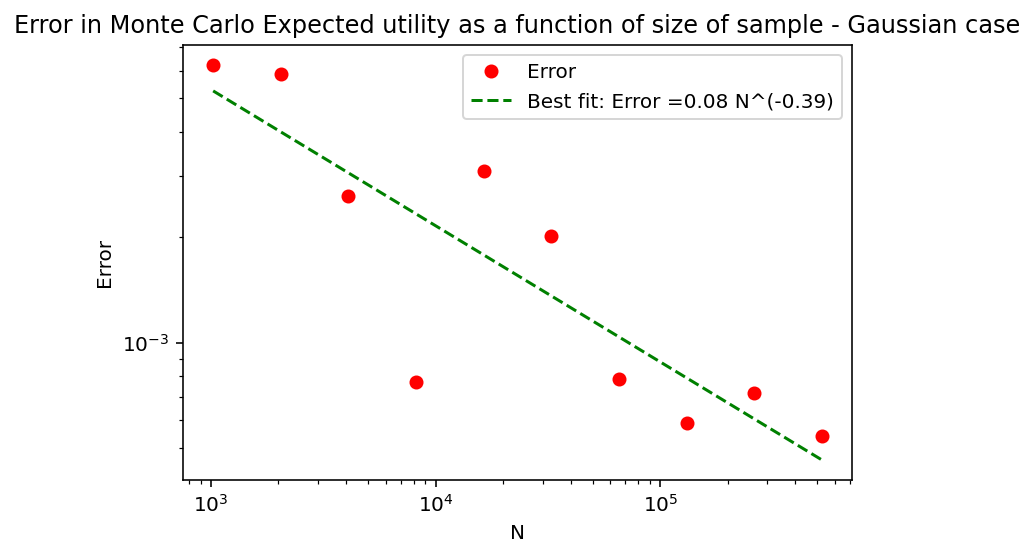

In [14]:
n_vec = 2**np.arange(10,20) # The number of MC simulations, we take powers of 2
rng = default_rng(1) # Fix the seed to "1", so that the plot looks the same every time you run it
u = np.array([cara_utility(rng.normal(mu,sd,N),1).mean() for N in n_vec])  # Create an MC expected utility for the sizes above
error = np.abs(u - expected_u(mu, sd, 1)) # Calculate the error
plt.loglog(n_vec, error, 'ro', label='Error') # Make a log log plot
plt.title('Error in Monte Carlo Expected utility as a function of size of sample - Gaussian case')
plt.xlabel('N')
plt.ylabel('Error')

# Let us also add a reference line. To do so, we need to calculate a simple regression. We can use the polyfit function
m, b = np.polyfit( np.log(n_vec), np.log(error), 1)
plt.loglog(n_vec, np.exp(b+m*np.log(n_vec)), 'g--', label='Best fit: Error ='+ "%.2f N^(%.2f)" % (math.exp(b),m))   
plt.legend()

The hardest line of code in the plot above is possibly
```python
plt.loglog(n_vec, np.exp(b+m*np.log(n_vec)), 'g--', label='Best fit: Error ='+ "%.2f N^(%.2f)" % (math.exp(b),m))   
```

Let us look at two parts in particular:

```python
'g--'
```
Means make a green dashed line.

while 
```python
label='Best fit: Error ='+ "%.2f N^(%.2f)" % (math.exp(b),m))   
```
means: take the value of exp(b), round it to a float with two decimal figures, do the same with m, and write a string that contains exp(b) N^ m with this format. This is saved on a variable label that is used by matplotlib to assign the legends in a plot.

Check that you understand the other lines of code.

Note that the best fit slope is close to -1/2 as expected. This is consistent with the theoretical error given before. **Write the equations to be sure you understand why.**

## Exercise

1. Compute, via a Monte-Carlo simulation, the expected utility of a CRRA investor for the following gambles.
    - $W_1 \sim |aN + b|$, where $N$ is standard normally distributed and $a,b \in R$.
    - $W_2 \sim \text{Exp}(\lambda_2)$ where $\lambda_2>0$.
	
You might have to look up online the commands for the corresponding random number generators. (Use the ones in numpy.random).

In [17]:
# We first implement the CRRA utility function


def crra(x,rho=1):
    if rho==1:
        return np.log(x)
    else:
        return (x**(1-rho))/(1-rho)

    
assert crra(5,1)== np.log(5)
assert crra(5,2)== -1/5


In [36]:
# We include here the number of MC simulations and the coeff. of relative risk aversion

num_samples = 10000
rho = 2


# W_1

a = 1
b = 2
w1 = np.abs(a*rng.standard_normal(num_samples)+b)
u1 = crra(w1,rho).mean()
print('The expected utility of $W_1$ is ', u1)

# W_2

mlambda = 0.5 # This is the rate parameter

w2 = rng.exponential(1/mlambda, num_samples)   # Note that the generator receives 1/lambda
u2 = crra(w2,rho).mean()
print('The expected utility of $W_2$ is ', u2)
if u2>u1:
    print('The investor will choose $W_2$')
else:
    print('The investor will choose $W_1$')

The expected utility of $W_1$ is  -1.5481311223192271
The expected utility of $W_2$ is  -5.875820936362287
The investor will choose $W_1$


Text(0.5, 1.0, 'Histogram for $W_1$')

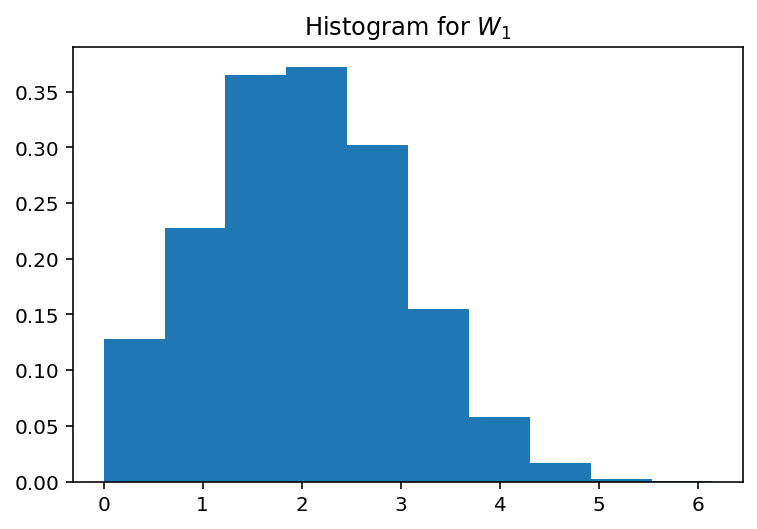

In [49]:
plt.hist(w1, density=True)
plt.title('Histogram for $W_1$')

Text(0.5, 1.0, 'Histogram for $W_2$')

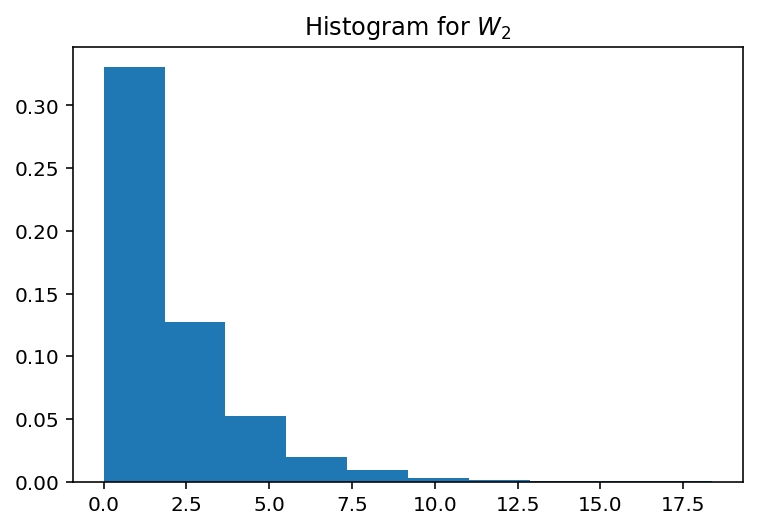

In [51]:
plt.hist(w2, density=True)
plt.title('Histogram for $W_2$')

In [0]:
rng.exponential?

2. Write a function that computes the certainty equivalent for a CRRA investor. (Hint: You might have to compute, on a piece of paper, $u^{-1}$ for the different relative risk aversions $\rho$.)

In [37]:

def ce_crra(x,rho):
    eu = crra(x,rho).mean()
    if rho==1:
        return np.exp(eu)
    else:
        return ((1-rho)*eu)**(1/(1-rho))


assert crra(ce_crra(w1,rho),rho)==u1,'Failed test with W1'
assert crra(ce_crra(w2,rho),rho)==u2,'Failed test with W2'
    
    
    
print('The expected utility of $W_1$ is ', ce_crra(w1,rho))
print('The expected utility of $W_2$ is ', ce_crra(w2,rho))


    


The expected utility of $W_1$ is  0.6459401181095812
The expected utility of $W_2$ is  0.17018898479556094


3. With $a = 1$ and $b = 2$, plot the certainty equivalent of a CRRA investor as a function of relative risk aversion $\rho$, using gamble $W_1$. 

Text(0, 0.5, 'Certainty equivalent')

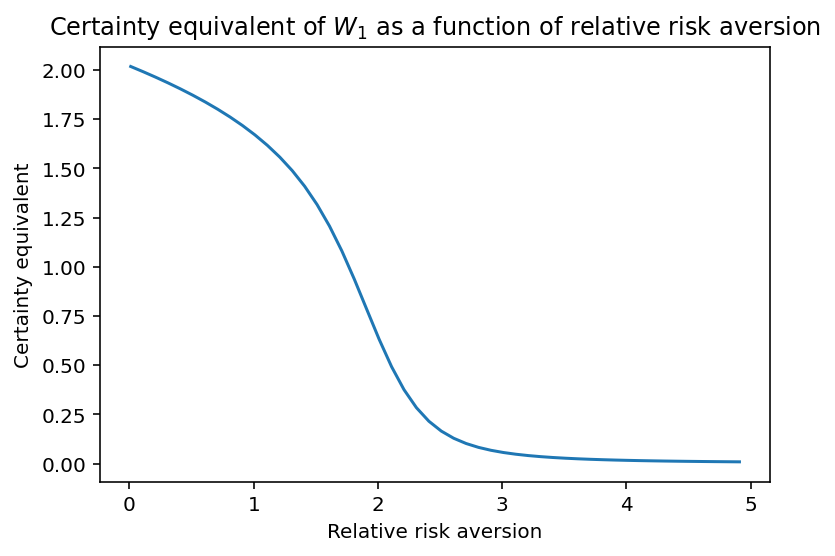

In [47]:


rho_vec = np.arange(0.01,5,0.1)
ce_vec = np.array([ce_crra(w1,rho) for rho in rho_vec])

plt.plot(rho_vec,ce_vec)
plt.title('Certainty equivalent of $W_1$ as a function of relative risk aversion')
plt.xlabel('Relative risk aversion')
plt.ylabel('Certainty equivalent')



The plot shows that the certainty equivalent decreases quickly as a function of the relative risk aversion. This is to be expected: as the coefficient of relative risk aversion increases, we are willing to exchange the risk in the distribution for only a small secure amount.